In [100]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [7]:
interest_rate = 0.07

df = pd.read_csv('file.csv', skiprows=22)
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
portfolios = [ "Lo 20", "Qnt 2", "Qnt 3", "Qnt 4", "Hi 20" ]
data = df[ [ 'Date', *portfolios ] ]
data.iloc[:, 1:] = data.iloc[:, 1:] / 100 # Convert percentages to arithmetic returns
data

,Date,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20
0,1963-07-01,-0.0072,-0.0077,-0.0055,-0.0060,-0.0069
1,1963-07-02,0.0085,0.0087,0.0069,0.0073,0.0098
2,1963-07-03,0.0045,0.0092,0.0065,0.0063,0.0048
3,1963-07-05,0.0081,0.0060,0.0018,0.0031,0.0060
4,1963-07-08,-0.0045,-0.0070,-0.0048,-0.0049,-0.0079
...,...,...,...,...,...,...
15476,2024-12-24,0.0115,0.0094,0.0196,0.0099,0.0097
15477,2024-12-26,0.0026,0.0007,-0.0017,-0.0016,0.0021
15478,2024-12-27,-0.0166,-0.0080,-0.0142,-0.0121,-0.0104
15479,2024-12-30,-0.0157,-0.0095,-0.0131,-0.0072,-0.0122


<h3>Subquestion 1</h3>

In [8]:
for portfolio in data.columns[1:]:
    annualised_return = 252 * data[portfolio].mean() - interest_rate
    annualised_std = data[portfolio].std() * np.sqrt(252)
    annualised_sharpe = annualised_return / annualised_std
    print(f'Portfolio: {portfolio} | Return: {100 * annualised_return:3f} % | St. Dev.: {annualised_std:3f} | Sharpe: {annualised_sharpe:3f}')

Portfolio: Lo 20 | Return: 2.308259 % | St. Dev.: 0.196517 | Sharpe: 0.117459
Portfolio: Qnt 2 | Return: 3.519344 % | St. Dev.: 0.166460 | Sharpe: 0.211423
Portfolio: Qnt 3 | Return: 4.871721 % | St. Dev.: 0.164272 | Sharpe: 0.296565
Portfolio: Qnt 4 | Return: 5.023270 % | St. Dev.: 0.162457 | Sharpe: 0.309207
Portfolio: Hi 20 | Return: 5.758222 % | St. Dev.: 0.166251 | Sharpe: 0.346358


<h3>Subquestion 2</h3>

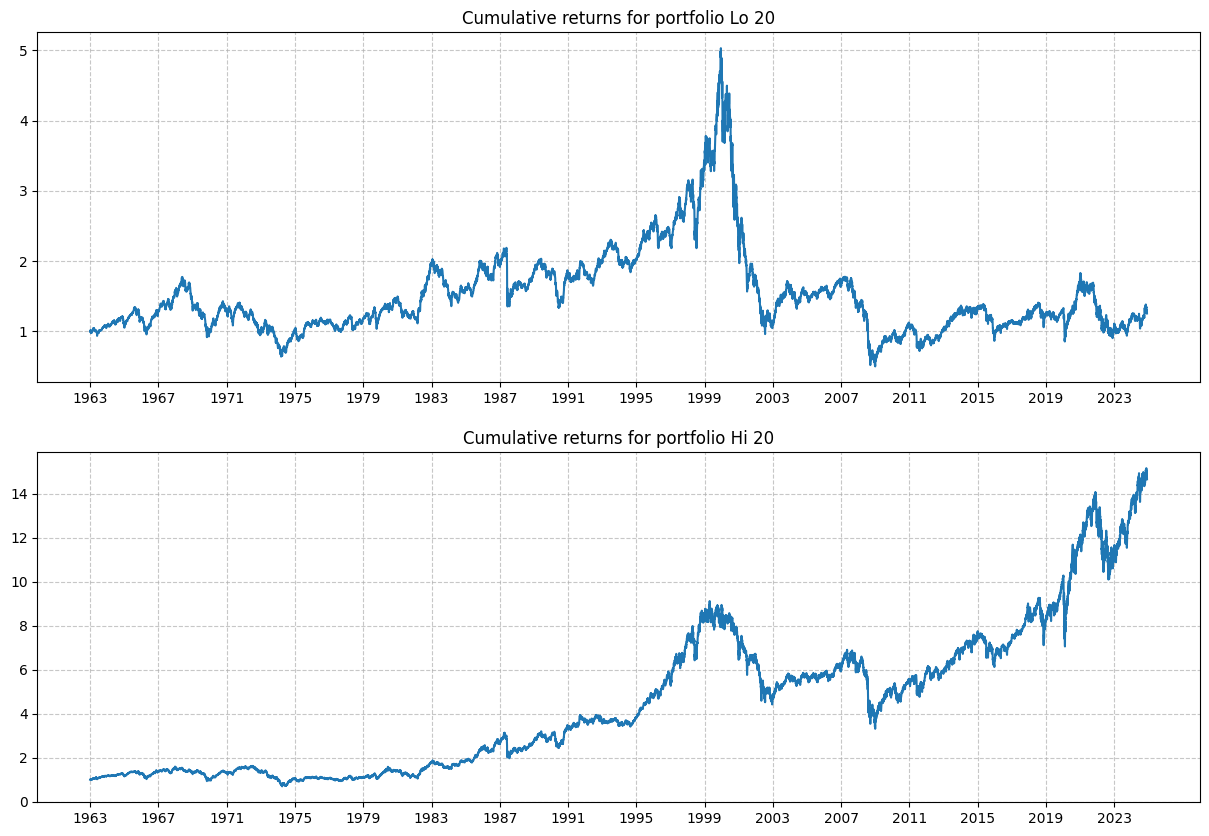

In [5]:
portfolios = [ 'Lo 20', 'Hi 20' ]

fig, axis = plt.subplots(2, 1, figsize=(15, 10))
for portfolio, ax in zip(portfolios, axis):
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.plot((1 + data[portfolio] - interest_rate / 252).cumprod())
    ax.set_xticks(range(0, len(data), 1000))
    ax.set_xticklabels(data['Date'][::1000].dt.year)
    ax.set_title(f'Cumulative returns for portfolio {portfolio}')

<h3>Subquestion 3-4</h3>

In [6]:
portfolios = [ 'Lo 20', 'Hi 20' ]
average_log_returns = {  }

for portfolio in portfolios:
    average_log_return = np.log(1 + data[portfolio] - interest_rate / 252).mean()
    average_log_returns[portfolio] = average_log_return

average_log_returns['Hi 20']/average_log_returns['Lo 20']
print(f"Average log returns for Hi 20 are {average_log_returns['Hi 20']/average_log_returns['Lo 20']:3f} times higher than for Lo 20")

Average log returns for Hi 20 are 11.863567 times higher than for Lo 20


<h3>Subquestion 5</h3>

/var/folders/sk/rwmnr4p95_jbdp49tmcbzt8c0000gn/T/ipykernel_93272/2861033660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EWP'] = 1/5 * (data['Lo 20'] + data['Qnt 2'] + data['Qnt 3'] + data['Qnt 4'] + data['Hi 20'])
/var/folders/sk/rwmnr4p95_jbdp49tmcbzt8c0000gn/T/ipykernel_93272/2861033660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['L_EWP'] = np.log(1 + data['EWP'] - interest_rate / 252)


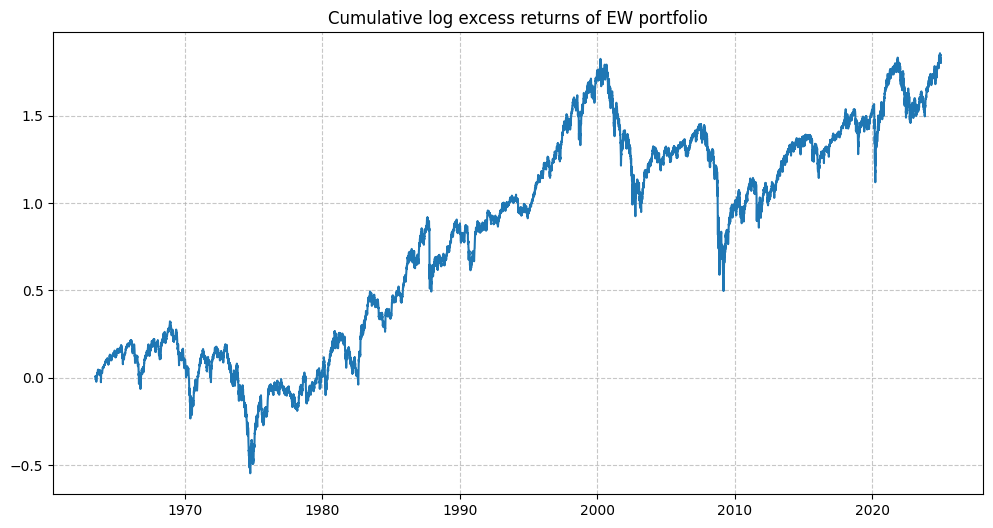

In [27]:
data['EWP'] = 1/5 * (data['Lo 20'] + data['Qnt 2'] + data['Qnt 3'] + data['Qnt 4'] + data['Hi 20'])
data['L_EWP'] = np.log(1 + data['EWP'] - interest_rate / 252)
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['L_EWP'].cumsum());
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)
plt.title('Cumulative log excess returns of EW portfolio');

<h3>Subquestion 6</h3>

In [39]:
kelly_coefficient = 0.5
means = data[portfolios].mean()
V = data[portfolios].cov()
f_star = kelly_coefficient * np.linalg.inv(V) @ (means - interest_rate / 252)
print(pd.Series(f_star, index = portfolios))
print(f'Sum of weights: {f_star.sum()}')
print(f'Sum of absolute values of weights: {np.abs(f_star).sum()}')

Lo 20   -1.979579
Qnt 2   -1.113762
Qnt 3    1.744188
Qnt 4    0.727139
Hi 20    1.806275
dtype: float64
Sum of weights: 1.1842604474076428
Sum of absolute values of weights: 7.370942612606523


<h3>Subquestion 7</h3>

In [46]:
alpha = 1/3
D = np.diag(np.diag(V))
V_epo = alpha * V + (1 - alpha) * D
f_star_EPO = kelly_coefficient * np.linalg.inv(V_epo) @ (means - interest_rate / 252)
print(pd.Series(f_star_EPO, index = portfolios))
print(f'Sum of weights: {f_star_EPO.sum()}')
print(f'Sum of absolute values of weights: {np.abs(f_star_EPO).sum()}')

Lo 20   -0.184327
Qnt 2    0.152978
Qnt 3    0.520710
Qnt 4    0.571317
Hi 20    0.727935
dtype: float64
Sum of weights: 1.7886135828358967
Sum of absolute values of weights: 2.1572682941097243


<h3>Subquestion 8</h3>

The correlation coefficient between the low profitability and market portfolio is: 0.949


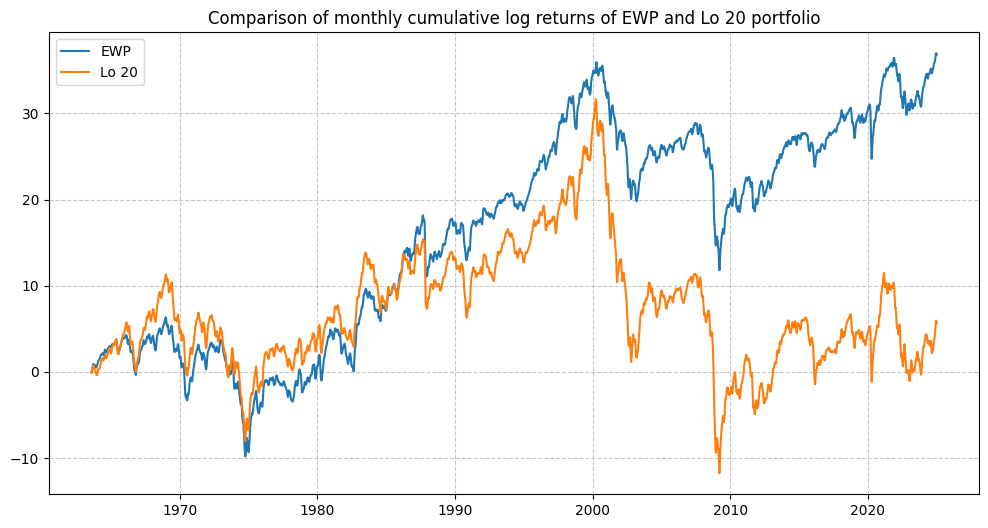

In [87]:
horizon = 20
n = len(data)
monthly_log_returns = {}
for portfolio in ['EWP', 'Lo 20']:
    log_return = np.log(1 + data[portfolio] - interest_rate / 252)
    monthly_log_return = np.zeros(n - horizon)
    for t in range(n - horizon):
        monthly_log_return[t] = log_return.iloc[t:t+horizon].sum()
    monthly_log_returns[portfolio] = monthly_log_return
print(f"The correlation coefficient between the low profitability and market portfolio is: {np.corrcoef(monthly_log_returns['EWP'], monthly_log_returns['Lo 20'])[1,0]:.3f}")
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][horizon:], monthly_log_returns['EWP'].cumsum(), label='EWP')
plt.plot(data['Date'][horizon:], monthly_log_returns['Lo 20'].cumsum(), label='Lo 20')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)
plt.title('Comparison of monthly cumulative log returns of EWP and Lo 20 portfolio');


Skewness of EWP portfolio monthly log returns: -1.203
-1.6168854244458652
Skewness of Lo 20 portfolio monthly log returns: -1.138
-1.6889118992131407


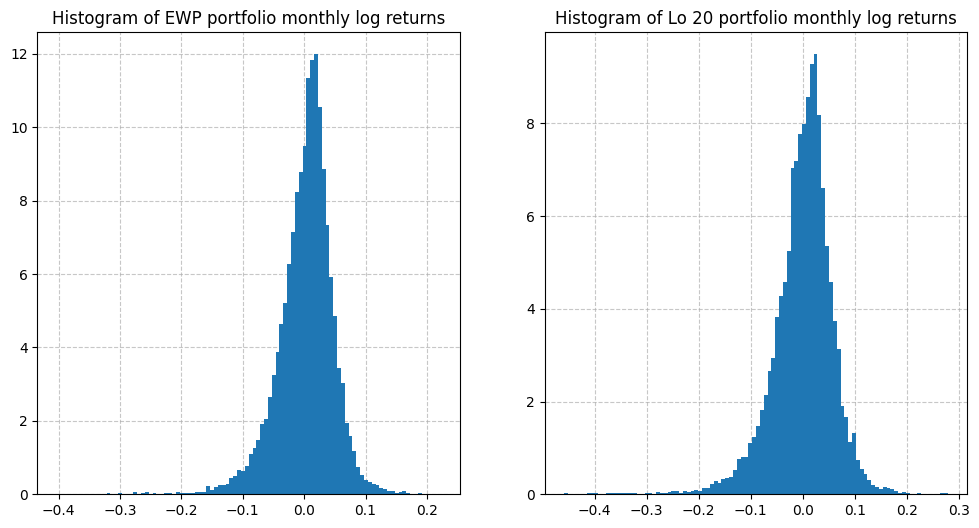

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
for ax, portfolio in zip(axis, monthly_log_returns.keys()):
    monthly_log_return = monthly_log_returns[portfolio]
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.hist(monthly_log_return, bins=100, density=True)
    ax.set_title(f'Histogram of {portfolio} portfolio monthly log returns')
    print(np.quantile(monthly_log_return, 0.05) / monthly_log_return.std()) 

The correlation coefficient between the low profitability and market portfolio is: 0.947


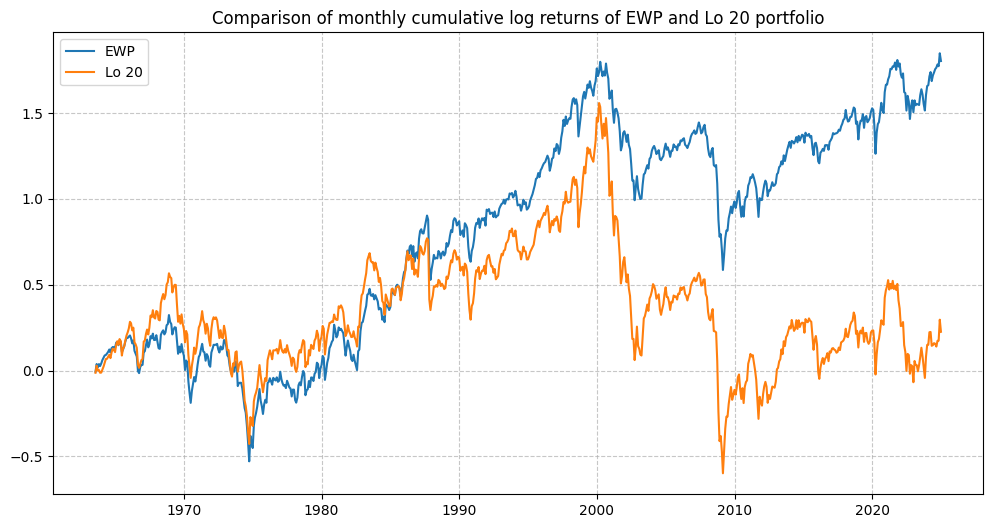

In [ ]:
data1 = data.copy()
data1.index = data1['Date']
monthly_log_returns = {}
for portfolio in ['EWP', 'Lo 20']:
    log_return = np.log(1 + data1[portfolio] - interest_rate / 252)
    monthly_log_returns[portfolio] = log_return.resample('ME').sum()
print(f"The correlation coefficient between the low profitability and market portfolio is: {np.corrcoef(monthly_log_returns['EWP'], monthly_log_returns['Lo 20'])[1,0]:.3f}")
plt.figure(figsize=(12, 6))
plt.plot(monthly_log_returns['EWP'].cumsum(), label='EWP')
plt.plot(monthly_log_returns['Lo 20'].cumsum(), label='Lo 20')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)
plt.title('Comparison of monthly cumulative log returns of EWP and Lo 20 portfolio');

Skewness of EWP portfolio monthly log returns: -0.765
-1.6943248735848282
Skewness of Lo 20 portfolio monthly log returns: -0.894
-1.698730078090971


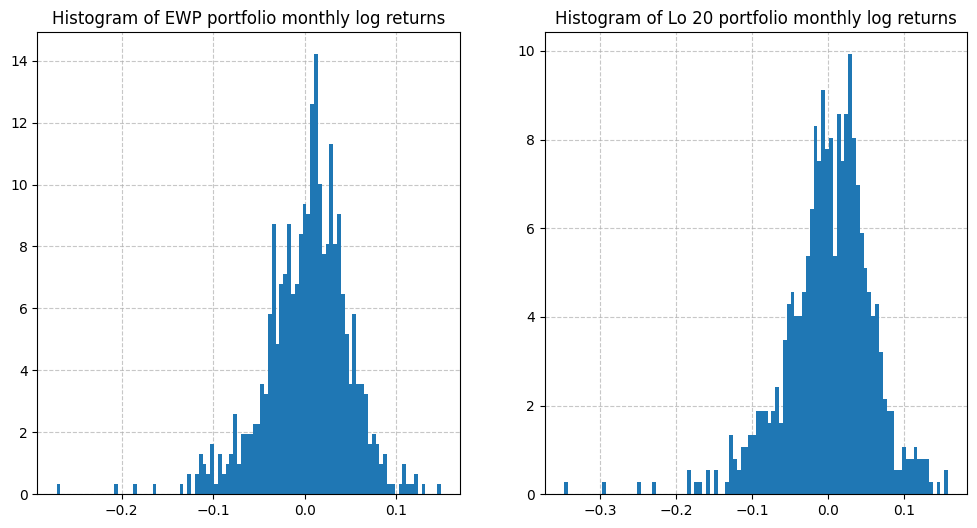

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
for ax, portfolio in zip(axis, monthly_log_returns.keys()):
    monthly_log_return = monthly_log_returns[portfolio]
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.hist(monthly_log_return, bins=100, density=True)
    ax.set_title(f'Histogram of {portfolio} portfolio monthly log returns')
    print(np.quantile(monthly_log_return, 0.05) / monthly_log_return.std()) 

<h3>Subquestion 9</h3>

In [60]:
returns_EPO = f_star_EPO.T @ data[portfolios].T
sharpe_EPO = (returns_EPO.mean() - interest_rate / 252) / returns_EPO.std()
annualised_sharpe_EPO = (252 * returns_EPO.mean() - interest_rate) / (returns_EPO.std() * np.sqrt(252))
print(f'Daily Sharpe ratio: {sharpe_EPO:.3f} | Annualised Sharpe ratio: {annualised_sharpe_EPO:.3f}')

Daily Sharpe ratio: 0.034 | Annualised Sharpe ratio: 0.537
